In [35]:
import pandas as pd
from google.colab import files
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
import joblib
import numpy as np

In [12]:
# Define the column names as the dataset does not have a header row
columns = ['Tweet_ID', 'Entity', 'Sentiment', 'Tweet_Content']

# Load the training dataset
train_df = pd.read_csv('twitter_training.csv', names=columns)

# Load the validation dataset
val_df = pd.read_csv('twitter_validation.csv', names=columns)

# Concatenate the two dataframes into df
df = pd.concat([train_df, val_df], ignore_index=True)

# Display the first few rows of the combined DataFrame
df.head()

,Tweet_ID,Entity,Sentiment,Tweet_Content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [10]:
# Define the column names as the dataset does not have a header row
columns = ['Tweet_ID', 'Entity', 'Sentiment', 'Tweet_Content']

# Load the training and validation datasets
# Make sure the file names match exactly what you uploaded
train_df = pd.read_csv('twitter_training.csv', names=columns)
val_df = pd.read_csv('twitter_validation.csv', names=columns)

# Display the first few rows to verify successful import
print("Training Data Sample:")
display(train_df.head())

print("\nValidation Data Sample:")
display(val_df.head())

# Check the shape of the data
print(f"\nTraining set rows: {train_df.shape[0]}")
print(f"Validation set rows: {val_df.shape[0]}")

Training Data Sample:


,Tweet_ID,Entity,Sentiment,Tweet_Content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...



Validation Data Sample:


,Tweet_ID,Entity,Sentiment,Tweet_Content
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...



Training set rows: 74682
Validation set rows: 1000


In [16]:
# 1. Load the datasets separately with the correct column names
column_names = ['Tweet_ID', 'Entity', 'Sentiment', 'Tweet_Content']

train_df = pd.read_csv('twitter_training.csv', names=column_names)
val_df = pd.read_csv('twitter_validation.csv', names=column_names)

# 2. Handle Missing Values
# We remove rows where the tweet text is empty
train_df.dropna(subset=['Tweet_Content'], inplace=True)
val_df.dropna(subset=['Tweet_Content'], inplace=True)

# 3. One-Hot Encoding for the 'Entity' column
# This converts the categorical 'Entity' column into multiple binary columns
train_df = pd.get_dummies(train_df, columns=['Entity'])
val_df = pd.get_dummies(val_df, columns=['Entity'])

# 4. Label Encoding for the 'Sentiment' column (The Target)
# Converts 'Positive', 'Negative', etc. into numbers 0, 1, 2, 3
le = LabelEncoder()
train_df['Sentiment'] = le.fit_transform(train_df['Sentiment'])
val_df['Sentiment'] = le.transform(val_df['Sentiment'])

# Remove the Tweet_ID as it is not needed for the ML model
train_df.drop('Tweet_ID', axis=1, inplace=True)
val_df.drop('Tweet_ID', axis=1, inplace=True)

print("Step 2 Complete: Categorical values handled with One-Hot Encoding!")
print(f"Total training features: {train_df.shape[1]}")
display(train_df.head())

Step 2 Complete: Categorical values handled with One-Hot Encoding!
Total training features: 34


,Sentiment,Tweet_Content,Entity_Amazon,Entity_ApexLegends,Entity_AssassinsCreed,Entity_Battlefield,Entity_Borderlands,Entity_CS-GO,Entity_CallOfDuty,Entity_CallOfDutyBlackopsColdWar,...,Entity_Overwatch,Entity_PlayStation5(PS5),Entity_PlayerUnknownsBattlegrounds(PUBG),Entity_RedDeadRedemption(RDR),Entity_TomClancysGhostRecon,Entity_TomClancysRainbowSix,Entity_Verizon,Entity_WorldOfCraft,Entity_Xbox(Xseries),Entity_johnson&johnson
0,3,im getting on borderlands and i will murder yo...,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,3,I am coming to the borders and I will kill you...,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,im getting on borderlands and i will kill you ...,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,3,im coming on borderlands and i will murder you...,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,3,im getting on borderlands 2 and i will murder ...,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [14]:
# Display summary statistics for the DataFrame
display(df.describe(include='all'))

,Tweet_ID,Entity,Sentiment,Tweet_Content
count,75682.000000,75682,75682,74996
unique,NaN,32,4,69974
top,NaN,TomClancysRainbowSix,Negative,It is not the first time that the EU Commissio...
freq,NaN,2435,22808,172
mean,6432.579583,NaN,NaN,NaN
std,3740.243463,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN
25%,3196.000000,NaN,NaN,NaN
50%,6423.000000,NaN,NaN,NaN
75%,9602.000000,NaN,NaN,NaN


# New Section

Please upload the `twitter_training.csv` and `twitter_validation.csv` files to your Colab environment. You can do this by clicking on the folder icon on the left sidebar, then clicking the 'Upload' icon (a paperclip pointing upwards) and selecting the files from your local machine.

In [18]:
# 1. Identify the columns to scale
# In this dataset, the 'numerical' features are the ones we created via One-Hot Encoding
# We exclude 'Sentiment' (the target) and 'Tweet_Content' (text)
features_to_scale = [col for col in train_df.columns if col.startswith('Entity_')]

scaler = StandardScaler()

# 2. Fit and Transform the training data
train_df[features_to_scale] = scaler.fit_transform(train_df[features_to_scale])

# 3. Transform the validation data (using the same scaler)
val_df[features_to_scale] = scaler.transform(val_df[features_to_scale])

print("Feature Scaling Complete!")
print("The Entity columns have been scaled to have a mean of 0 and variance of 1.")
display(train_df[features_to_scale].head())

Feature Scaling Complete!
The Entity columns have been scaled to have a mean of 0 and variance of 1.


,Entity_Amazon,Entity_ApexLegends,Entity_AssassinsCreed,Entity_Battlefield,Entity_Borderlands,Entity_CS-GO,Entity_CallOfDuty,Entity_CallOfDutyBlackopsColdWar,Entity_Cyberpunk2077,Entity_Dota2,...,Entity_Overwatch,Entity_PlayStation5(PS5),Entity_PlayerUnknownsBattlegrounds(PUBG),Entity_RedDeadRedemption(RDR),Entity_TomClancysGhostRecon,Entity_TomClancysRainbowSix,Entity_Verizon,Entity_WorldOfCraft,Entity_Xbox(Xseries),Entity_johnson&johnson
0,-0.178142,-0.181227,-0.176439,-0.179751,5.608421,-0.178465,-0.18214,-0.180829,-0.177576,-0.181466,...,-0.179751,-0.178747,-0.176439,-0.177049,-0.179951,-0.181665,-0.181704,-0.181387,-0.178424,-0.180071
1,-0.178142,-0.181227,-0.176439,-0.179751,5.608421,-0.178465,-0.18214,-0.180829,-0.177576,-0.181466,...,-0.179751,-0.178747,-0.176439,-0.177049,-0.179951,-0.181665,-0.181704,-0.181387,-0.178424,-0.180071
2,-0.178142,-0.181227,-0.176439,-0.179751,5.608421,-0.178465,-0.18214,-0.180829,-0.177576,-0.181466,...,-0.179751,-0.178747,-0.176439,-0.177049,-0.179951,-0.181665,-0.181704,-0.181387,-0.178424,-0.180071
3,-0.178142,-0.181227,-0.176439,-0.179751,5.608421,-0.178465,-0.18214,-0.180829,-0.177576,-0.181466,...,-0.179751,-0.178747,-0.176439,-0.177049,-0.179951,-0.181665,-0.181704,-0.181387,-0.178424,-0.180071
4,-0.178142,-0.181227,-0.176439,-0.179751,5.608421,-0.178465,-0.18214,-0.180829,-0.177576,-0.181466,...,-0.179751,-0.178747,-0.176439,-0.177049,-0.179951,-0.181665,-0.181704,-0.181387,-0.178424,-0.180071


In [20]:
def clean_text(text):
    # Convert to string (handling potential non-string inputs)
    text = str(text).lower()
    # Remove URLs
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    # Remove user mentions (@user)
    text = re.sub(r'@\w+', '', text)
    # Remove hashtags (#)
    text = re.sub(r'#', '', text)
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove extra whitespace
    text = text.strip()
    return text

# Apply the cleaning function to the dataset
print("Cleaning text... please wait.")
train_df['Tweet_Content'] = train_df['Tweet_Content'].apply(clean_text)
val_df['Tweet_Content'] = val_df['Tweet_Content'].apply(clean_text)

# Drop any rows where the text might have become empty after cleaning
train_df = train_df[train_df['Tweet_Content'] != '']
val_df = val_df[val_df['Tweet_Content'] != '']

print("Text Cleaning Complete!")
print("\nSample of cleaned text:")
display(train_df[['Tweet_Content']].head())

Cleaning text... please wait.
Text Cleaning Complete!

Sample of cleaned text:


,Tweet_Content
0,im getting on borderlands and i will murder yo...
1,i am coming to the borders and i will kill you...
2,im getting on borderlands and i will kill you all
3,im coming on borderlands and i will murder you...
4,im getting on borderlands and i will murder y...


In [23]:
# 1. Define X and y for the Training Set
# X contains the text and the scaled entity columns
# y contains only the Sentiment column
X_train_full = train_df.drop('Sentiment', axis=1)
y_train_full = train_df['Sentiment']

# 2. Define X and y for the Validation Set
X_test = val_df.drop('Sentiment', axis=1)
y_test = val_df['Sentiment']

# 3. Optional: Split the training data further to have a 'Validation' set
# while keeping the original validation file as a final 'Test' set.
# This helps in tuning the model without "cheating" by looking at the test data.
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.2, random_state=42
)

print("Split Complete!")
print(f"Final Training set size: {X_train.shape[0]}")
print(f"Internal Validation set size: {X_val.shape[0]}")
print(f"Final Test set size (from original validation file): {X_test.shape[0]}")

# Show what X looks like
X_train.head()

Split Complete!
Final Training set size: 58920
Internal Validation set size: 14730
Final Test set size (from original validation file): 1000


,Tweet_Content,Entity_Amazon,Entity_ApexLegends,Entity_AssassinsCreed,Entity_Battlefield,Entity_Borderlands,Entity_CS-GO,Entity_CallOfDuty,Entity_CallOfDutyBlackopsColdWar,Entity_Cyberpunk2077,...,Entity_Overwatch,Entity_PlayStation5(PS5),Entity_PlayerUnknownsBattlegrounds(PUBG),Entity_RedDeadRedemption(RDR),Entity_TomClancysGhostRecon,Entity_TomClancysRainbowSix,Entity_Verizon,Entity_WorldOfCraft,Entity_Xbox(Xseries),Entity_johnson&johnson
7508,used cheats on my smurf account did an overwat...,-0.178142,-0.181227,-0.176439,-0.179751,-0.178303,-0.178465,-0.18214,-0.180829,-0.177576,...,5.563265,-0.178747,-0.176439,-0.177049,-0.179951,-0.181665,-0.181704,-0.181387,-0.178424,-0.180071
12155,this is fake and is a genuine twitter unk,-0.178142,-0.181227,-0.176439,-0.179751,-0.178303,-0.178465,-0.18214,-0.180829,-0.177576,...,-0.179751,-0.178747,-0.176439,-0.177049,-0.179951,-0.181665,-0.181704,-0.181387,-0.178424,-0.180071
1576,yes on arin on so the happy for ya,-0.178142,-0.181227,-0.176439,-0.179751,5.608421,-0.178465,-0.18214,-0.180829,-0.177576,...,-0.179751,-0.178747,-0.176439,-0.177049,-0.179951,-0.181665,-0.181704,-0.181387,-0.178424,-0.180071
33667,this skin didnt age well localpolarbear,-0.178142,-0.181227,-0.176439,-0.179751,-0.178303,-0.178465,-0.18214,-0.180829,-0.177576,...,-0.179751,-0.178747,-0.176439,-0.177049,-0.179951,-0.181665,-0.181704,-0.181387,-0.178424,-0.180071
44915,have been paying verizon for over years but h...,-0.178142,-0.181227,-0.176439,-0.179751,-0.178303,-0.178465,-0.18214,-0.180829,-0.177576,...,-0.179751,-0.178747,-0.176439,-0.177049,-0.179951,-0.181665,5.503449,-0.181387,-0.178424,-0.180071


In [26]:
# 1. Prepare the text data
# We combine the text with our models using a Pipeline for easier processing
X_train_text = X_train['Tweet_Content']
X_test_text = X_test['Tweet_Content']

# 2. Initialize the 3 Algorithms
# Note: We use LogisticRegression instead of LinearRegression for classification
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100)
}

# 3. Training Loop
trained_models = {}

print("Starting training... (Random Forest may take a minute)")

for name, model in models.items():
    # We create a pipeline that first turns text to numbers, then trains the model
    pipeline = Pipeline([
        ('tfidf', TfidfVectorizer(max_features=5000)),
        ('clf', model)
    ])

    pipeline.fit(X_train_text, y_train)
    trained_models[name] = pipeline
    print(f"{name} has been trained.")

print("\nAll models are ready for evaluation!")

Starting training... (Random Forest may take a minute)
Logistic Regression has been trained.
Decision Tree has been trained.
Random Forest has been trained.

All models are ready for evaluation!


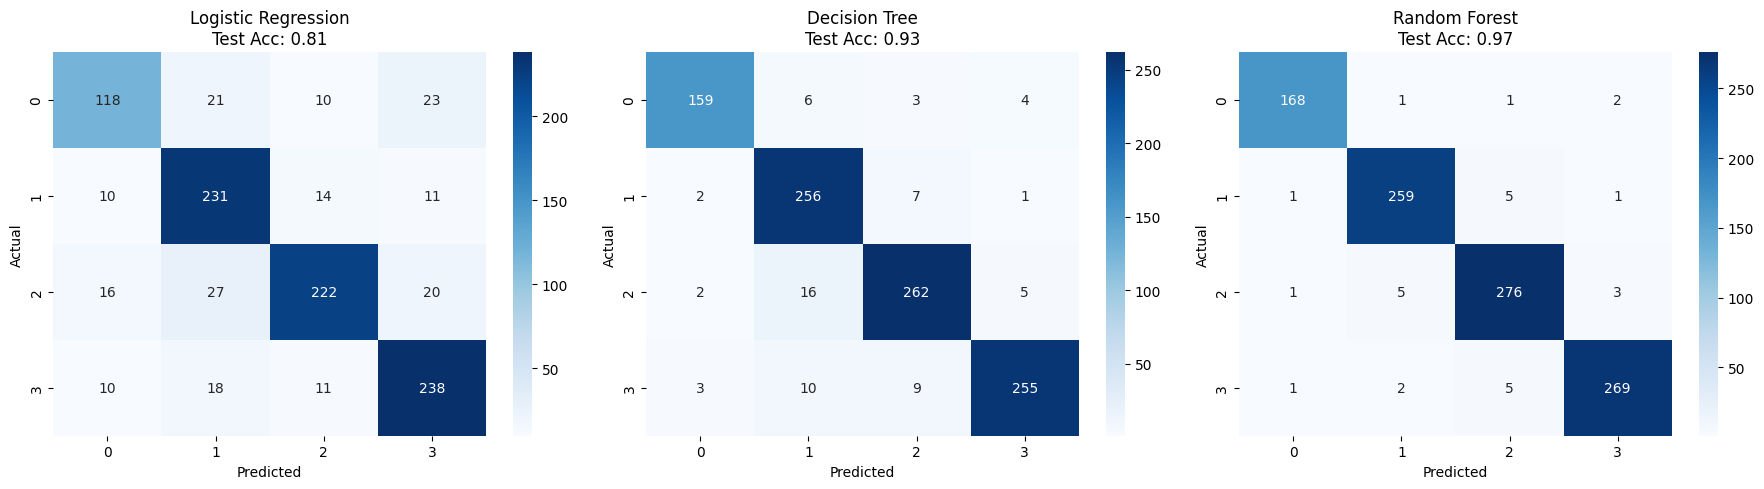


--- Model Performance Comparison ---
                 Model  Train Acc  Test Acc
0  Logistic Regression   0.755261     0.809
1        Decision Tree   0.987576     0.932
2        Random Forest   0.987576     0.972


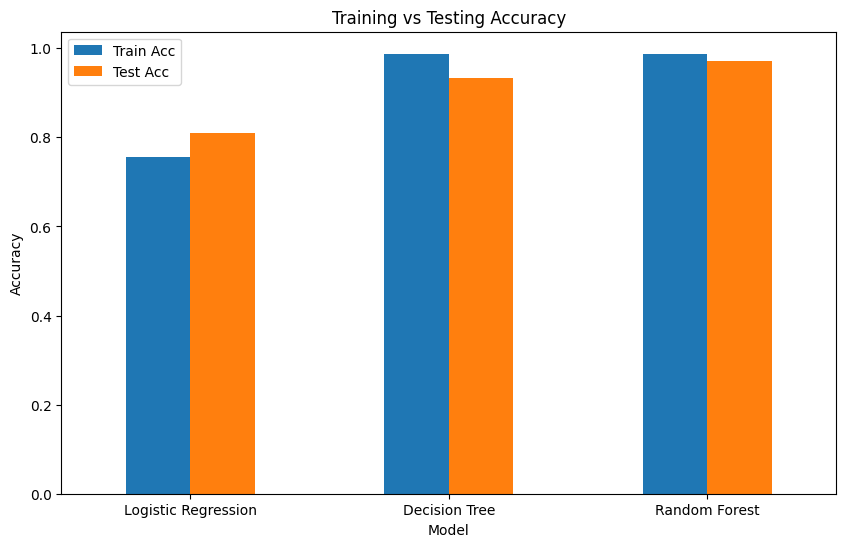

In [32]:
# 1. Prepare Features (X) and Target (y)
# We use 'Tweet_Content' and all columns starting with 'Entity_'
entity_cols = [col for col in train_df.columns if col.startswith('Entity_')]
features = ['Tweet_Content'] + entity_cols

X_train_final = train_df[features]
y_train_final = train_df['Sentiment']
X_test_final = val_df[features]
y_test_final = val_df['Sentiment']

# 2. Define the Preprocessor (TF-IDF for text, remainder 'passthrough' for scaled entities)
preprocessor = ColumnTransformer(
    transformers=[
        ('text', TfidfVectorizer(max_features=5000), 'Tweet_Content')
    ],
    remainder='passthrough'
)

# 3. Define the Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=50, n_jobs=-1) # Small n_estimators for speed
}

# 4. Train, Evaluate, and Plot
results = []
plt.figure(figsize=(18, 5))

for i, (name, model) in enumerate(models.items()):
    # Create and fit pipeline
    clf_pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

    clf_pipeline.fit(X_train_final, y_train_final)

    # Predictions
    y_train_pred = clf_pipeline.predict(X_train_final)
    y_test_pred = clf_pipeline.predict(X_test_final)

    # Calculate Accuracy
    train_acc = accuracy_score(y_train_final, y_train_pred)
    test_acc = accuracy_score(y_test_final, y_test_pred)

    results.append({"Model": name, "Train Acc": train_acc, "Test Acc": test_acc})

    # Plot Confusion Matrix
    plt.subplot(1, 3, i+1)
    cm = confusion_matrix(y_test_final, y_test_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name}\nTest Acc: {test_acc:.2f}")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

plt.tight_layout()
plt.show()

# 5. Display Accuracy Comparison Table
results_df = pd.DataFrame(results)
print("\n--- Model Performance Comparison ---")
print(results_df)

# Plotting Accuracy Comparison
results_df.set_index('Model').plot(kind='bar', figsize=(10, 6))
plt.title('Training vs Testing Accuracy')
plt.ylabel('Accuracy')
plt.xticks(rotation=0)
plt.show()

In [34]:
# Replace 'Random Forest' with the name of your best performing model
best_model_name = "Random Forest"
best_model_pipeline = trained_models[best_model_name]

# Save the model to a file
joblib.dump(best_model_pipeline, 'sentiment_model.pkl')
print(f"Model saved as sentiment_model.pkl")

Model saved as sentiment_model.pkl


In [36]:
def predict_sentiment(tweet, entity):
    # 1. Load the model
    model = joblib.load('sentiment_model.pkl')

    # 2. Pre-process the input tweet text
    cleaned_tweet = clean_text(tweet) # Using the clean_text function we wrote earlier

    # 3. Handle the Entity (One-Hot Encoding alignment)
    # We need to create a row that has the same columns as the training data
    # Initialize all entity columns to 0 (or the scaled equivalent)
    input_data = pd.DataFrame({'Tweet_Content': [cleaned_tweet]})

    for col in entity_cols:
        # If this is the chosen entity, set to the scaled '1' value, else scaled '0'
        # Since we scaled them, we use the scaler's logic or just match the name
        if col == f'Entity_{entity}':
            input_data[col] = 1
        else:
            input_data[col] = 0

    # Apply Scaling to the entity columns (using the scaler from previous step)
    input_data[entity_cols] = scaler.transform(input_data[entity_cols])

    # 4. Predict
    prediction = model.predict(input_data)
    sentiment_label = le.inverse_transform(prediction)[0]

    return sentiment_label

# --- TEST IT ---
test_tweet = "I absolutely love the new updates in Borderlands, it's amazing!"
test_entity = "Borderlands"

result = predict_sentiment(test_tweet, test_entity)
print(f"Tweet: {test_tweet}")
print(f"Entity: {test_entity}")
print(f"Predicted Sentiment: {result}")

Tweet: I absolutely love the new updates in Borderlands, it's amazing!
Entity: Borderlands
Predicted Sentiment: Neutral


In [37]:
import ipywidgets as widgets
from IPython.display import display, clear_output

# 1. Get the list of unique entities for the dropdown menu
# We remove the 'Entity_' prefix to make it look clean in the UI
available_entities = [col.replace('Entity_', '') for col in entity_cols]

# 2. Create UI Elements
tweet_input = widgets.Textarea(
    value='',
    placeholder='Type a tweet here...',
    description='Tweet:',
    style={'description_width': 'initial'},
    layout={'width': '80%', 'height': '100px'}
)

entity_dropdown = widgets.Dropdown(
    options=sorted(available_entities),
    value=available_entities[0],
    description='Select Entity:',
    style={'description_width': 'initial'}
)

predict_button = widgets.Button(
    description='Predict Sentiment',
    button_style='primary', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click to analyze the tweet',
    icon='search'
)

output_area = widgets.Output()

# 3. Define the Button Click Logic
def on_predict_button_clicked(b):
    with output_area:
        clear_output()
        tweet = tweet_input.value
        entity = entity_dropdown.value

        if tweet.strip() == "":
            print("⚠️ Please enter some text first.")
            return

        print(f"Analyzing sentiment for entity: {entity}...")

        # Use our previously created inference function
        result = predict_sentiment(tweet, entity)

        # Format the output color based on sentiment
        color_map = {
            'Positive': 'green',
            'Negative': 'red',
            'Neutral': 'blue',
            'Irrelevant': 'gray'
        }
        sentiment_color = color_map.get(result, 'black')

        from IPython.display import HTML
        display(HTML(f"<h3>Predicted Sentiment: <span style='color:{sentiment_color}'>{result}</span></h3>"))

# 4. Attach the function to the button
predict_button.on_click(on_predict_button_clicked)

# 5. Display the UI
print("--- Twitter Sentiment Analysis Interface ---")
display(tweet_input, entity_dropdown, predict_button, output_area)

--- Twitter Sentiment Analysis Interface ---


Textarea(value='', description='Tweet:', layout=Layout(height='100px', width='80%'), placeholder='Type a tweet…

Dropdown(description='Select Entity:', options=('Amazon', 'ApexLegends', 'AssassinsCreed', 'Battlefield', 'Bor…

Button(button_style='primary', description='Predict Sentiment', icon='search', style=ButtonStyle(), tooltip='C…

Output()